## Nemoretriever Graphic Element v1 Demo

In [1]:
%load_ext autoreload
%autoreload 2

### Inference
- We provide the minimal steps to run the model.

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from model import define_model
from utils import plot_sample, postprocess_preds_graphic_element, reformat_for_plotting

In [3]:
# Load image
path = "./example.png"
img = Image.open(path).convert("RGB")
img = np.array(img)

In [4]:
# Load model
model = define_model("graphic_element_v1")

 -> Loading weights from weights.pth


In [5]:
# Inference
with torch.inference_mode():
    x = model.preprocess(img)
    preds = model(x, img.shape)[0]

In [6]:
# Post-processing
boxes, labels, scores = postprocess_preds_graphic_element(preds, model.threshold, model.labels)

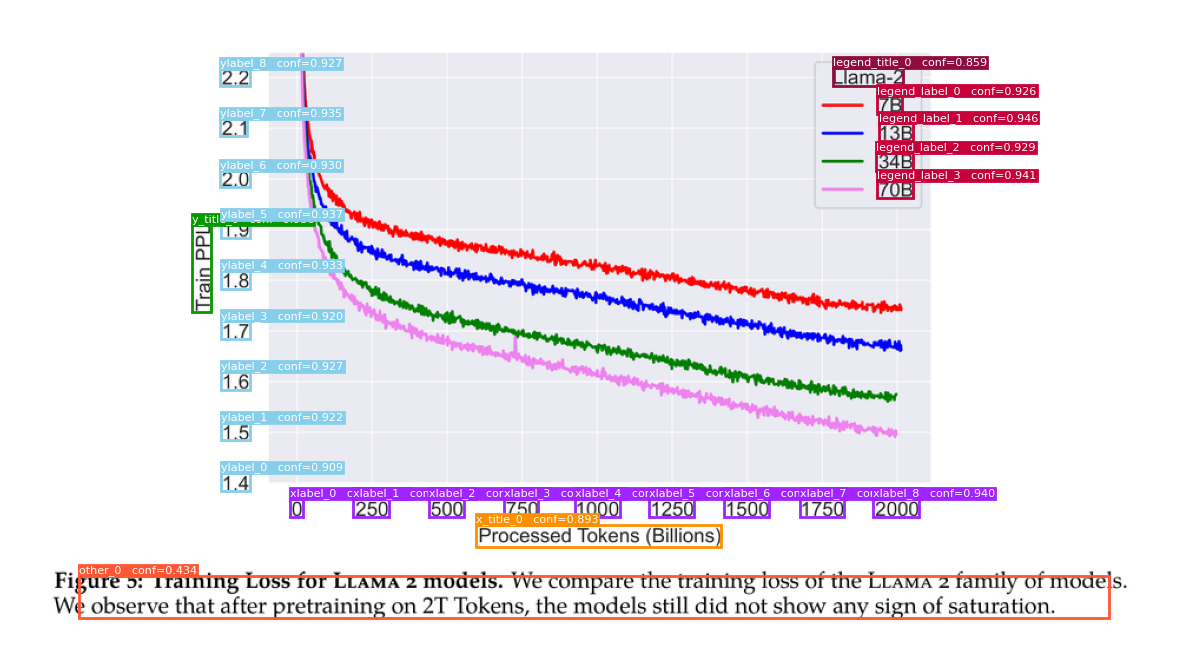

In [7]:
# Plot
boxes_plot, confs = reformat_for_plotting(boxes, labels, scores, img.shape, model.num_classes)

plt.figure(figsize=(15, 10))
plot_sample(img, boxes_plot, confs, labels=model.labels)
plt.show()

## Advanced Post-processing
- Predictions are a bit noisy as-is, we provide more utility functions for better ingestion
- Depending on your use-case, you might chose to apply some of the steps

In [8]:
from post_processing.graphic_elt_pp import expand_boxes, retrieve_title

### Retrieve missed captions
- The model is not trained to predict captions, and will predict them in `other` class.
- Since this is the most important class, if no caption is found, we look for the biggest `other` box

In [9]:
labels = retrieve_title(boxes, labels, model.labels)

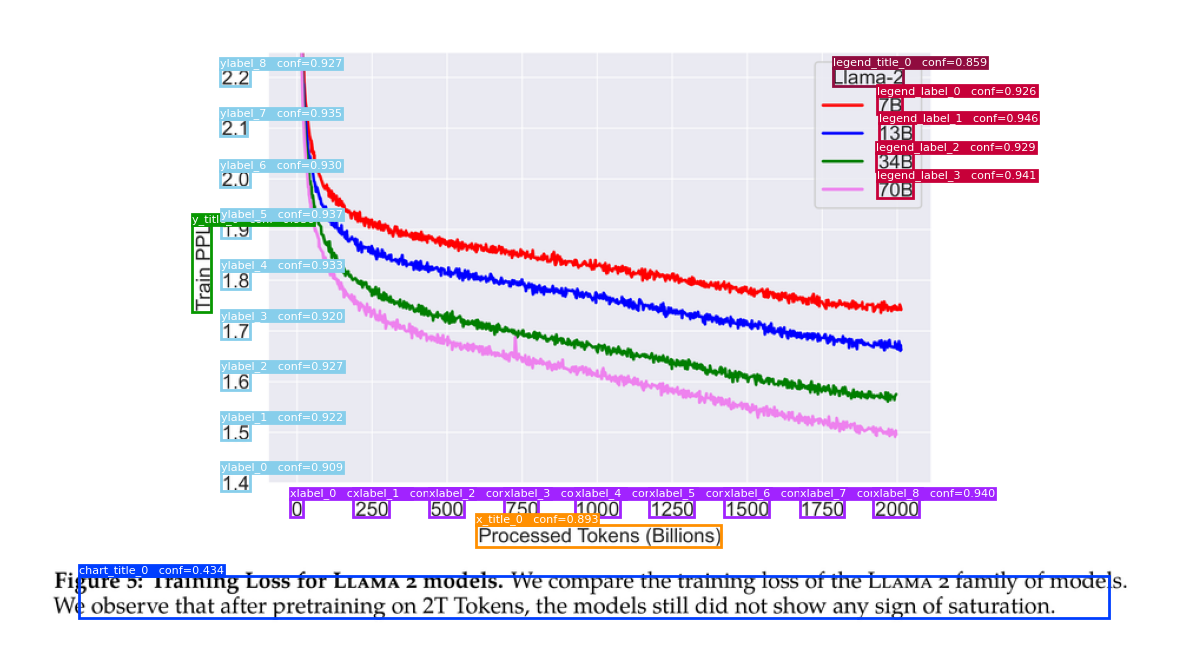

In [10]:
# Plot
boxes_plot, confs = reformat_for_plotting(boxes, labels, scores, img.shape, model.num_classes)

plt.figure(figsize=(15, 10))
plot_sample(img, boxes_plot, confs, labels=model.labels)
plt.show()

### Expansion
- YOLOX boxes can be too tight, box expansion can help making the model more robust

In [11]:
ids_ = labels == model.labels.index("chart_title")
boxes[ids_] = expand_boxes(
    boxes[ids_],
    r_x=(1.025, 1.025),
    r_y=(1.1, 1.1),
    size_agnostic=False,
)

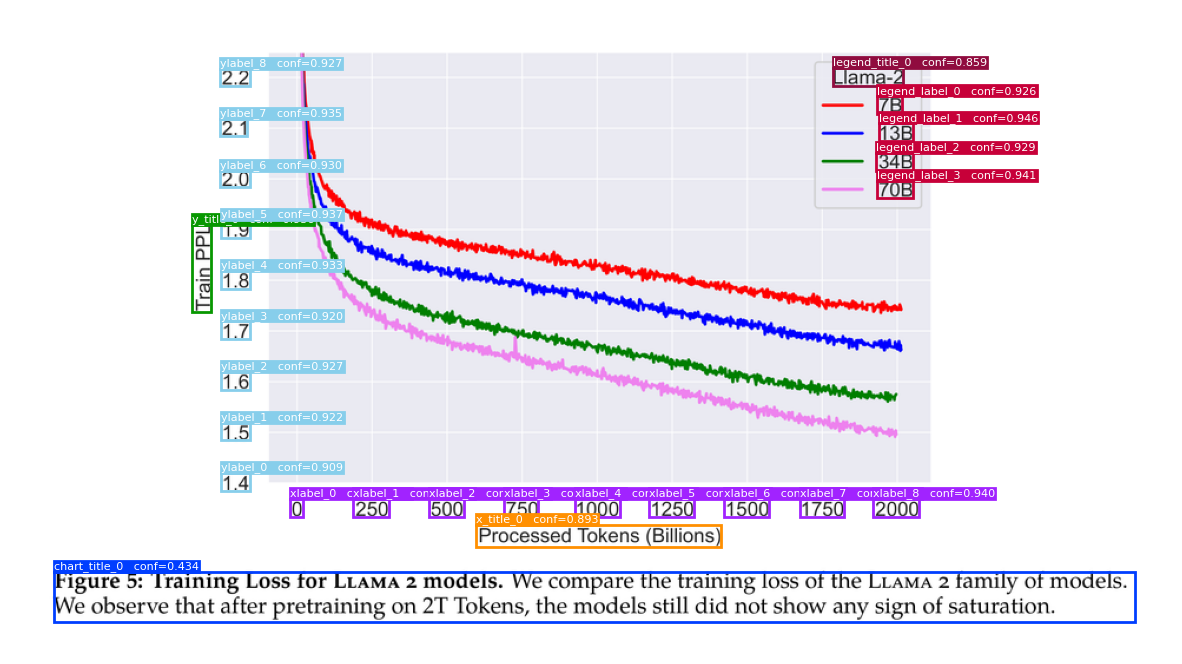

In [12]:
# Plot
boxes_plot, confs = reformat_for_plotting(boxes, labels, scores, img.shape, model.num_classes)

plt.figure(figsize=(15, 10))
plot_sample(img, boxes_plot, confs, labels=model.labels)
plt.show()

Done !